# Assignment 2: Web scrapping and retriving data about top 50 solar flares

## Task 1: Data Scraping and Preparation.

**Step 1**: Scraping competitor’s data, using Python to scrape data for the top 50 solar
flares shown in SpaceWeatherLive.com.

In [ ]:
from bs4 import BeautifulSoup
import requests as rq
import pandas as pd
import numpy as np


In [ ]:
# Pulling the data from the webpage
agent = {"User-Agent":'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36'}
url = rq.get('https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares',headers= agent)

#Reading and parsing data as html 
soup = BeautifulSoup(url.content,'html5lib')


#printing parsed data of html
#print(soup.prettify())

#Saving the table as a variable
table = soup.find('table')

In [ ]:
#Creating a table using pandas
data_table = pd.DataFrame(columns=['rank', 'x_class', 'date', 'region', 'start_time', 'max_time', 'end_time', 'movie'], index = range(0,50))

# Put data in the data_table from the website
num_rows = 0
rows = table.find_all('tr')
for row in rows:
    num_cols = 0
    columns = row.find_all('td')
    num_rows += 1
    for column in columns:
          data_table.iat[num_rows-2, num_cols] = column.get_text()
          num_cols += 1

data_table.head()

,rank,x_class,date,region,start_time,max_time,end_time,movie
0,1,X28+,2003/11/04,0486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,0486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,0808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive


**Step 2:** Tidy the top 50 solar flare data. The next step is to make sure that this table
is usable using pandas:

In [ ]:
#Dropping the last column of the table.
data_table = data_table.drop('movie', axis=1)

data_table.head(10)


,rank,x_class,date,region,start_time,max_time,end_time
0,1,X28+,2003/11/04,0486,19:29,19:53,20:06
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03
2,3,X17.2+,2003/10/28,0486,09:51,11:10,11:24
3,4,X17+,2005/09/07,0808,17:17,17:40,18:03
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55
5,6,X10,2003/10/29,0486,20:37,20:49,21:01
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10
8,9,X9,2006/12/05,0930,10:18,10:35,10:45
9,10,X8.3,2003/11/02,0486,17:03,17:25,17:39


In [ ]:
from pandas.io.sql import date
#combine the date and each of the three time columns into three datetime columns 
data_table['start_time_date'] = data_table['date'].astype(str)+ ' '  + data_table['start_time'].astype(str)

data_table['max_time_date'] = data_table['date'].astype(str)  + ' ' + data_table['max_time'].astype(str)

data_table['end_time_date'] = data_table['date'].astype(str)  + ' ' + data_table['end_time'].astype(str)


data_table.head()

,rank,x_class,date,region,start_time,max_time,end_time,start_time_date,max_time_date,end_time_date
0,1,X28+,2003/11/04,0486,19:29,19:53,20:06,2003/11/04 19:29,2003/11/04 19:53,2003/11/04 20:06
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,2001/04/02 21:32,2001/04/02 21:51,2001/04/02 22:03
2,3,X17.2+,2003/10/28,0486,09:51,11:10,11:24,2003/10/28 09:51,2003/10/28 11:10,2003/10/28 11:24
3,4,X17+,2005/09/07,0808,17:17,17:40,18:03,2005/09/07 17:17,2005/09/07 17:40,2005/09/07 18:03
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,2001/04/15 13:19,2001/04/15 13:50,2001/04/15 13:55


In [ ]:
#dropping the duplicate columns
data_table = data_table.drop('date', axis = 1)
data_table = data_table.drop('start_time', axis = 1)
data_table = data_table.drop('max_time', axis = 1)
data_table = data_table.drop('end_time', axis = 1)

data_table.head()

,rank,x_class,region,start_time_date,max_time_date,end_time_date
0,1,X28+,0486,2003/11/04 19:29,2003/11/04 19:53,2003/11/04 20:06
1,2,X20+,9393,2001/04/02 21:32,2001/04/02 21:51,2001/04/02 22:03
2,3,X17.2+,0486,2003/10/28 09:51,2003/10/28 11:10,2003/10/28 11:24
3,4,X17+,0808,2005/09/07 17:17,2005/09/07 17:40,2005/09/07 18:03
4,5,X14.4,9415,2001/04/15 13:19,2001/04/15 13:50,2001/04/15 13:55


**Step 3:** Scrape the NASA data:  Scraping the data in Wind/WAVES type II
bursts and CMEs to get additional data about these solar flares.

In [ ]:
# Pulling the html data from the website
agent = {"User-Agent":'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36'}
url2 = rq.get('https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html',headers= agent)

#Reading and parsing data as html 
soup2 = BeautifulSoup(url2.content,'html5lib')

#printing parsed data of html
#print(soup2.prettify())

table2 = soup2.find('pre')


In [ ]:
#creating a table called data_table2 and adding data to it from the NASA HTML page
num_rows = 0
data = table2.get_text()
lines = data.split('\n')

#to remove and get the item in the list lines
for i in range(0,11):
    lines.pop(0)

#to remove and get the second to last item in the list lines
lines.pop(len(lines)-1)
lines.pop(len(lines)-1)
lines.pop(len(lines)-1)

#creating data_table2 and naming the columns
data_table2 = pd.DataFrame(columns=['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region','flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed'], index = range(0,len(lines)))

#code for splitting the cols using white spaces and then removing it from the list
for line in lines:
    cols = line.split(' ')
    while '' in cols:
        cols.remove('')
    num_cols = 0
#adding data to the table
    while num_cols < 14:
        data_table2.iat[num_rows, num_cols] = cols[num_cols]
        num_cols += 1
    num_rows += 1

data_table2.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712


**Step 4:** Tidy the NASA table. We next tidy up the NASA table. We will code missing
observations properly, recode columns that correspond to more than one piece of information, and treat dates and times appropriately.

In [ ]:
#replacing all non value columns with 'NAN'

data_table2 = data_table2.replace('-----','NAN')
data_table2 = data_table2.replace('----','NAN')
data_table2 = data_table2.replace('','NAN')
data_table2


,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252
517,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,NAN,NAN,09/17,12:00,Halo,360,1385
518,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,NAN,NAN,10/18,08:00,85,146,1001
519,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692


In [ ]:
#creating a new column with boolean if cme_ange is Halo
data_table2.loc[data_table2['cme_angle'] == 'Halo', 'is_hslo'] = 'true'
data_table2.loc[data_table2['cme_angle'] != 'Halo', 'is_hslo'] = 'false'

#replacing the rows in the cme_angle column if they have value as 'Halo'
data_table2.loc[data_table2['cme_angle'] == 'Halo', 'cme_angle'] = 'NA'



In [ ]:
#creating another column called width_lower_bound for lower bound

def cont(Name):
    if '>' in Name:
        return 'true'
    else: return 'false'
    return Name


data_table2['width_lower_bound']=data_table2['cme_width'].apply(cont)

#removing non-numeric data from cme_width column

data_table2['cme_width'] = data_table2['cme_width'].str.extract('(\d+)', expand=False)

#droping all NAN values from the row

data_table2 = data_table2.dropna(subset=['cme_width'])

#renaming data_table2 to nasa_table for further clarity
nasa_table = data_table2


#combine the date and each of the three time columns into two datetime columns 
data_table2['start_time_date'] = data_table2['start_date'].astype(str)+ ' '  + data_table2['start_time'].astype(str)


data_table2['end_time_date'] = data_table2['start_date'].astype(str)  + ' ' + data_table2['end_time'].astype(str)




data_table2.head(10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_hslo,width_lower_bound,start_time_date,end_time_date
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,false,false,1997/04/01 14:00,1997/04/01 14:15
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NA,360,878,true,false,1997/04/07 14:30,1997/04/07 17:30
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NA,360,464,true,false,1997/05/12 05:15,1997/05/12 16:00
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,false,false,1997/05/21 20:20,1997/05/21 22:00
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,false,false,1997/09/23 21:53,1997/09/23 22:16
5,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227,false,false,1997/11/03 05:15,1997/11/03 12:00
6,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352,false,false,1997/11/03 10:30,1997/11/03 11:30
7,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,NA,360,785,true,false,1997/11/04 06:00,1997/11/04 04:30
8,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,NA,360,1556,true,false,1997/11/06 12:20,1997/11/06 08:30
9,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441,false,false,1997/11/27 13:30,1997/11/27 14:00


## Task 2: Analysis.

Question 1: Replication.

In [ ]:
# filtering table according to the data in flare_classification that have X class flare since X flares are the most intense.
top_50_flares = data_table2.loc[data_table2['flare_classification'].str.contains('X')]

# Stripping X from the data to sort the data accordingly
top_50_flares['flare_classification'] = top_50_flares['flare_classification'].str.lstrip('X')

# Changing the type to float for sorting
top_50_flares['flare_classification'] = top_50_flares.flare_classification.astype(float)

#sorting the values in descending oreder so that the most intense flare will be on top
top_50_flares = top_50_flares.sort_values('flare_classification', ascending = False)

#adding a column called flares_rank to denote the rank of top_50_flares
top_50_flares['flares_rank'] = range(1, len(top_50_flares) + 1)

#converting float to string
top_50_flares['flare_classification'] = top_50_flares.flare_classification.astype(str)

#adding X back to flare_classification
top_50_flares['flare_classification'] = "X" + top_50_flares['flare_classification']

# Change the order of the columns and dropping flare_classification
top_50_flares = top_50_flares[['flares_rank','flare_classification', 'start_time_date',	'start_time',	'end_date',	'end_time_date',	'start_frequency',	'end_frequency',	'flare_location',	'flare_region',	'cme_date',	'cme_time',	'cme_angle',	'cme_width',	'cme_speed',	'is_hslo',	'width_lower_bound']]
top_50_flares

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,flares_rank,flare_classification,start_time_date,start_time,end_date,end_time_date,start_frequency,end_frequency,flare_location,flare_region,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_hslo,width_lower_bound
240,1,X28.0,2003/11/04 20:00,20:00,11/04,2003/11/04 24:00,10000,200,S19W83,10486,11/04,19:54,NA,360,2657,true,false
117,2,X20.0,2001/04/02 22:05,22:05,04/03,2001/04/02 02:30,14000,250,N19W72,9393,04/02,22:06,261,244,2505,false,false
233,3,X17.0,2003/10/28 11:10,11:10,10/29,2003/10/28 24:00,14000,40,S16E08,10486,10/28,11:30,NA,360,2459,true,false
126,4,X14.0,2001/04/15 14:05,14:05,04/16,2001/04/15 13:00,14000,40,S20W85,9415,04/15,14:06,245,167,1199,false,false
234,5,X10.0,2003/10/29 20:55,20:55,10/29,2003/10/29 24:00,11000,500,S15W02,10486,10/29,20:54,NA,360,2029,true,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,85,X1.0,2001/11/04 16:30,16:30,11/06,2001/11/04 11:00,14000,70,N06W18,9684,11/04,16:35,NA,360,1810,true,false
196,86,X1.0,2002/08/03 19:20,19:20,08/03,2002/08/03 20:30,14000,2000,S16W76,10039,08/03,19:31,259,138,1150,false,false
428,87,X1.0,2013/11/19 10:39,10:39,11/19,2013/11/19 20:20,14000,100,S14W70,11893,11/19,10:36,NA,360,740,true,false
80,88,X1.0,2000/07/11 13:00,13:00,07/11,2000/07/11 13:30,12000,1000,N18E27,9077,07/11,13:27,NA,360,1078,true,false


Write a sentence or two
discussing how well you can replicate the SpaceWeatherLive data from the NASA data.?

From the first appearance of table we can say that the replication effort is succesfull

## Question 2: Integration. 



In [ ]:
#replacing + sign in x_class
data_table['x_class'] = data_table['x_class'].str.replace('+', '')

# filtering table according to the data in x_class that have X class flare since X flares are the most intense.
data_table = data_table.loc[data_table['x_class'].str.contains('X')]

# Stripping X from the data to sort the data accordingly
data_table['flare_classification'] = data_table['x_class'].str.lstrip('X')

# Changing the type to float for sorting
data_table['flare_classification'] = data_table.flare_classification.astype(float)

#sorting the values in descending oreder so that the most intense flare will be on top
data_table = data_table.sort_values('flare_classification', ascending = False)

#adding a column called flares_rank to denote the rank of data_table
data_table['flares_rank'] = range(1, len(data_table) + 1)

#converting float to string
data_table['flare_classification'] = data_table.flare_classification.astype(str)

#adding X back to flare_classification
data_table['flare_classification'] = "X" + data_table['flare_classification']

# Change the order of the columns and dropping x_class
data_table = data_table[['flare_classification',	'start_time_date',	'end_time_date']]

data_table.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,flare_classification,start_time_date,end_time_date
0,X28.0,2003/11/04 19:29,2003/11/04 20:06
1,X20.0,2001/04/02 21:32,2001/04/02 22:03
2,X17.2,2003/10/28 09:51,2003/10/28 11:24
3,X17.0,2005/09/07 17:17,2005/09/07 18:03
4,X14.4,2001/04/15 13:19,2001/04/15 13:55


In [ ]:
#merging data_table and top_50_flares using right join

final_flare_table = pd.merge(data_table, top_50_flares, how = 'right', left_on=['flare_classification','start_time_date','end_time_date'], right_on = ['flare_classification','start_time_date','end_time_date'])

#sorting final_flares_table using flares_rank
final_flare_table = final_flare_table.sort_values('flares_rank')

#rearanging the table
final_flare_table = final_flare_table[['flares_rank', 'flare_classification',	'start_time_date',	'end_time_date','end_date',	'start_frequency',	'end_frequency',	'flare_location',	'flare_region',	'cme_date',	'cme_time',	'cme_angle',	'cme_width',	'cme_speed',	'is_hslo',	'width_lower_bound']]

final_flare_table.head()

,flares_rank,flare_classification,start_time_date,end_time_date,end_date,start_frequency,end_frequency,flare_location,flare_region,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_hslo,width_lower_bound
0,1,X28.0,2003/11/04 20:00,2003/11/04 24:00,11/04,10000,200,S19W83,10486,11/04,19:54,NA,360,2657,true,false
1,2,X20.0,2001/04/02 22:05,2001/04/02 02:30,04/03,14000,250,N19W72,9393,04/02,22:06,261,244,2505,false,false
2,3,X17.0,2003/10/28 11:10,2003/10/28 24:00,10/29,14000,40,S16E08,10486,10/28,11:30,NA,360,2459,true,false
3,4,X14.0,2001/04/15 14:05,2001/04/15 13:00,04/16,14000,40,S20W85,9415,04/15,14:06,245,167,1199,false,false
4,5,X10.0,2003/10/29 20:55,2003/10/29 24:00,10/29,11000,500,S15W02,10486,10/29,20:54,NA,360,2029,true,false


I used right join to merge both the table of the top 50 with NASA table. I based it off of which columns they shared the same value. forexample, both have flares_classification and start and end date for each flares, which have to be same.


### Question 3: Analysis.

In [ ]:
import matplotlib.pyplot as plt


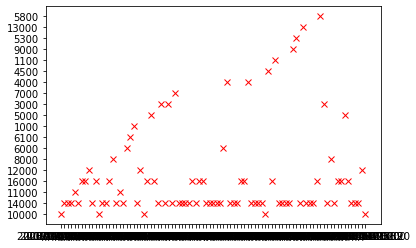

In [ ]:
#ploting attribites in top 50 of nasa dataset
plt.plot(top_50_flares['start_time_date'],top_50_flares['start_frequency'],'x',color='red')

From the data we can see that there is a corelation between frequency and cme width becuase most of them happened to have halo cmes.

In [ ]:
#getting count of halo fro top_50_flares

true_count_50 = 0
false_count_50 = 0

for i, rows in top_50_flares.iterrows():
  if rows['is_hslo'] == 'true':
    true_count_50 += 1
  else: false_count_50 += 1

true_count_all = 0
false_count_all = 0

for i, rows in nasa_table.iterrows():
  if rows['is_hslo'] == 'true':
    true_count_all += 1
  else: false_count_all += 1

halo_all = int(true_count_all)
halo_50 = int(true_count_50)
not_halo_all = int(false_count_all) 
not_halo_50 = int(false_count_50)



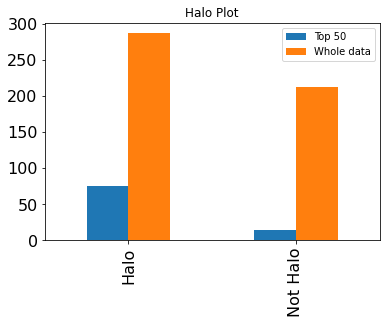

In [ ]:
# initialize data of lists.
data = {'Top 50': [halo_50, not_halo_50],
        'Whole data': [halo_all, not_halo_all]}
  
# Creates pandas DataFrame.
df = pd.DataFrame(data, index=['Halo','Not Halo'])

#plotting the data frame
df.plot(kind = 'bar',title ="Halo Plot", legend=True, fontsize=16)

from the graph we could conclude that there is a corelation between frequency and cme width because majority of top 50 flares have halos